# Gaussian Mixture Models. EM algorithm. KMeans

## Data Preprocessing

In [282]:
import pandas as pd

df = pd.read_csv('data/wine.csv')

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [284]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [285]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [286]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('Customer_Segment', axis=1)
X = scaler.fit_transform(X)

In [287]:
# PCA for noise reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

## Silhouette Score

In [297]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def draw_silhouette_plot(X, n_clusters, ax):
    clusterer = KMeans(n_clusters=n_clusters, random_state=69, n_init=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    ax.set_xlim([-1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax.set_yticks([])
    ax.set_xticks(np.arange(-1, 1.1, 0.2))

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f'The Silhouette Plot for n_clusters={n_clusters}')
    ax.legend([f'Cluster {i+1}' for i in range(
        n_clusters)] + ['Silhouette Score'])


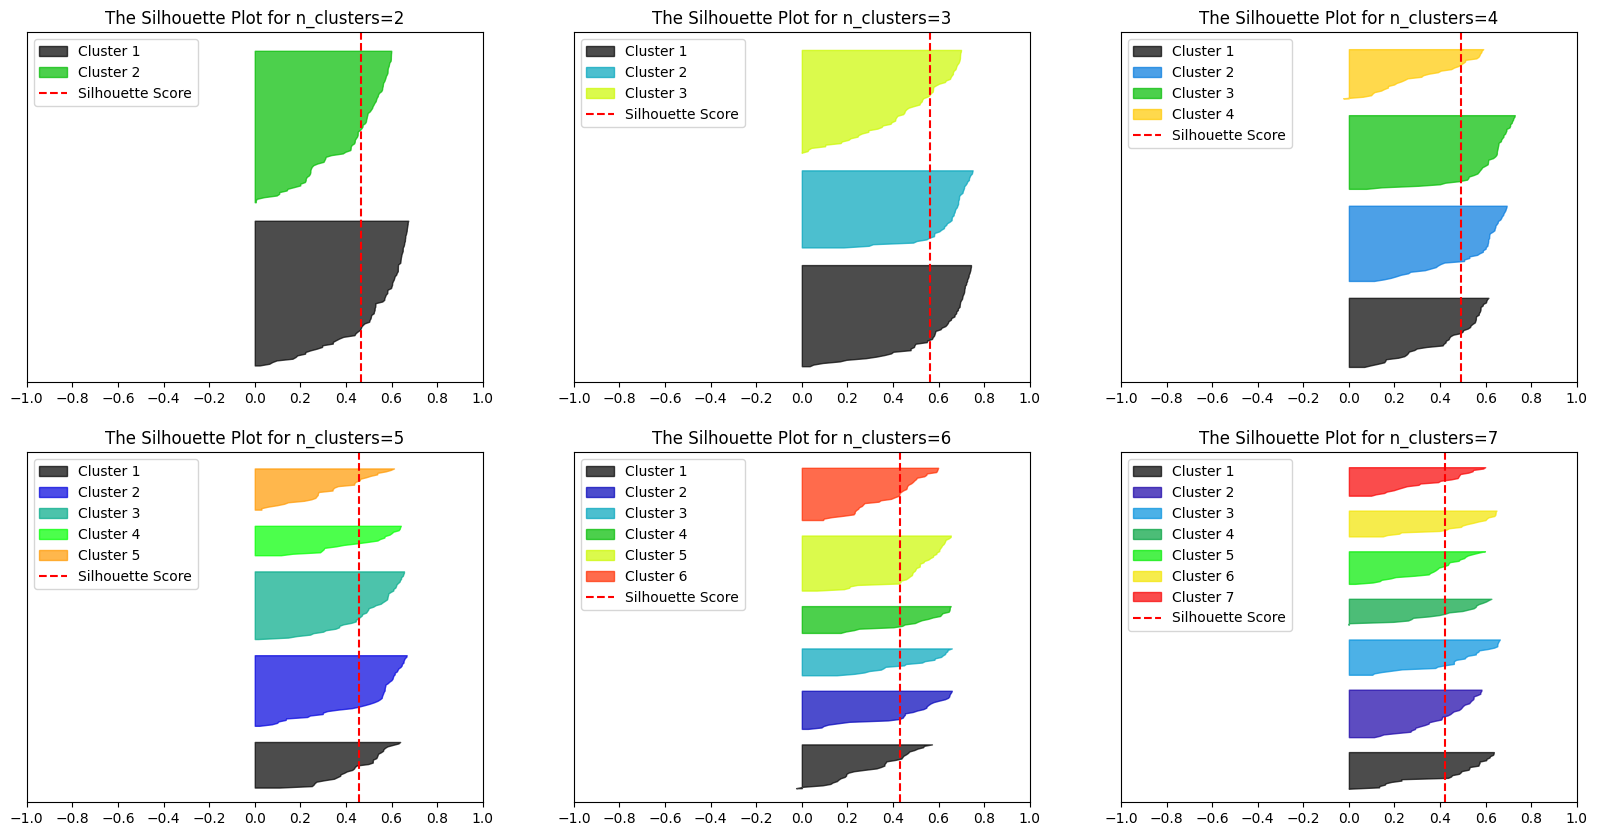

In [298]:
n_clusters_values = range(2, 8)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for n_clusters in n_clusters_values:
    ax = axes[(n_clusters - 2) // 3][(n_clusters - 2) % 3]
    draw_silhouette_plot(X, n_clusters, ax)

Based on the plots, the number of clusters is 3, since it has the highest silhouette score and the shapes of the clusters are not too different.

## GMM

In [290]:
from matplotlib.patches import Ellipse


def plot_gmm(gmm, X, label=True, ax=None):
    def draw_ellipse(position, covariance, ax=None, **kwargs):
        ax = ax or plt.gca()
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            print(np.sqrt(covariance))
            width, height = 2 * np.sqrt(covariance)
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height, **kwargs))

    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

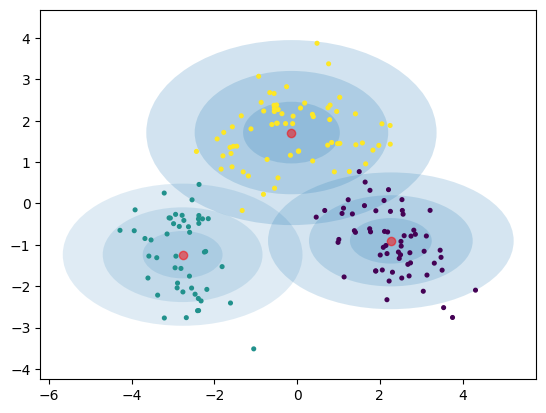

In [296]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=69).fit(X)
labels = gmm.predict(X)
means = gmm.means_

plot_gmm(gmm, X)
plt.scatter(means[:, 0], means[:, 1], marker='o', c='red', alpha=0.5)
plt.show()

### Clusters Analysis

In [292]:
means = pca.inverse_transform(means)
means = scaler.inverse_transform(means)

pd.DataFrame(data=means, columns=df.columns[:-1])

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.619019,1.943693,2.443341,17.657046,108.178610,2.889927,2.980879,0.281123,2.016543,5.700444,1.053223,3.110021,1054.441438
1,13.162467,3.402536,2.475205,21.656317,99.433814,1.663933,0.859575,0.468786,1.123742,7.142981,0.691474,1.730523,639.730076
2,12.314179,1.944582,2.218525,19.664234,92.157551,2.191950,1.977441,0.360800,1.528044,2.987985,1.057197,2.774728,538.368289


1. Cluster 1

- High Proline (1054)
- High Flavanoids (2.8)
- High Phenols (2.9)
- High Proanthocyanins (2.01)
- High 0D280 (3.11)
- Low Nonflavanoid Phenols (0.28)

2. Cluster 2

- Low Phenols (1.6)
- High Malic Acid (3.4)
- High Color Intensity (7.14)
- High Ash Alcalinity (21.6)
- Low Hue (0.69)

3. Cluster 3

- Low Proline (538)
- Moderate Flavonoids (1.97)
- Moderate 0D280 (2.77)
- Low Color Intensity (3.1)
- Moderate Nonflavanoid Phenols (0.36)

(Words like "high" and "low" are relative to the other clusters.)

## KMeans

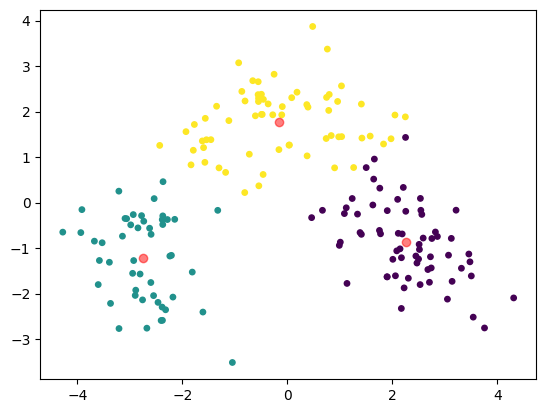

In [295]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=69)
kmeans.fit(X)
ids = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=ids, s=15, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=0.5)
plt.show()

### Clusters Analysis

In [269]:
centers = kmeans.cluster_centers_
centers = pca.inverse_transform(centers)
centers = scaler.inverse_transform(centers)

pd.DataFrame(data=centers, columns=df.columns[:-1])

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.604308,1.934267,2.440091,17.658345,108.018292,2.888409,2.981019,0.280987,2.015706,5.654390,1.055617,3.114407,1050.137865
1,13.155415,3.390069,2.473045,21.638972,99.374073,1.668556,0.869290,0.467850,1.127275,7.107871,0.694600,1.739504,638.943165
2,12.289522,1.937900,2.213769,19.687020,91.869227,2.183270,1.966610,0.361572,1.522129,2.925744,1.058940,2.774189,529.691716


1. Cluster 1

- High Phenols (2.88)
- High Flavanoids (2.98)
- Low Nonflavanoid Phenols (0.28)
- High Proanthocyanins (2.01)
- High 0D280 (3.11)
- High Proline (1050)

2. Cluster 2

- High Malic Acid (3.4)
- High Ash Alcalinity (21.63)
- Low Phenols (1.66)
- Low Flavonoids (0.86)
- High Color Intensity (7.10)

3. Cluster 3

- Moderate Flavanoids (1.97)
- Moderate Nonflavanoid Phenols (0.36)
- Low Color Intensity (3.1)
- Moderate 0D280 (2.77)
- Low Proline (538)

(Words like "high" and "low" are relative to the other clusters.)